In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install statsmodels
!pip install seaborn
import seaborn as sns
!pip install pandas_profiling
import pandas_profiling

You should consider upgrading via the 'd:\sh program\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\sh program\anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached pandas_profiling-2.9.0-py2.py3-none-any.whl (258 kB)
  Using cached confuse-1.4.0-py2.py3-none-any.whl (21 kB)
  Using cached visions-0.5.0-py3-none-any.whl (64 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached Jinja2-2.11.2-py2.py3-none-any.whl (125 kB)
  Using cached requests-2.25.0-py2.py3-none-any.whl (61 kB)
  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
  Using cached tangled_up_in_unicode-0.0.6-py3-none-any.whl (3.1 MB)
  Using cached phik-0.10.0-py3-none-any.whl (599 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached attrs-20.3.0-py2.py3-none-any.whl (49 kB)
  Using cached tqdm-4.54.1-py2.py3-none-any.whl (69 kB)
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
  Using cached ImageHash-4.2.0-py2.py3-none-any.whl (295 kB)
  Using cached numba-0.52.0-cp37-cp37m-win_amd64.whl (2.3 MB)
  Using cached PyWavelets-1.1.1-cp37-cp37m-win_amd64.whl (4.2 MB)
  Using cached llvmlite-0.35.0-cp37-cp37m-win_amd64.whl (16.0 MB)

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

conda-build 3.18.8 requires libarchive-c, which is not installed.
phik 0.10.0 requires joblib>=0.14.1, but you'll have joblib 0.14.0 which is incompatible.
You should consider upgrading via the 'd:\sh program\anaconda3\python.exe -m pip install --upgrade pip' command.


# Data preprocessing

In [2]:
#Unify the format of date

df_stock = pd.read_csv('S&P 500^GSPC(2.18-12.03).csv')
data_time = pd.to_datetime(df_stock.date, format='%Y/%m/%d', errors='coerce')
for i in range(len(df_stock['date'])):   
    df_stock['date'][i] = str(data_time[i].month)+'-'+str(data_time[i].day)+'-'+str(data_time[i].year)
df_stock.to_csv('S&P 500^GSPC(2.18-12.03) UnifyDate.csv')

df_mobi = pd.read_csv('consumerMobility(2.18-12.03).csv')
data_time = pd.to_datetime(df_mobi.date, format='%m/%d/%Y', errors='coerce')
for i in range(len(df_mobi['date'])):   
    df_mobi['date'][i] = str(data_time[i].month)+'-'+str(data_time[i].day)+'-'+str(data_time[i].year)
df_mobi.to_csv('consumerMobility(2.18-12.03) UnifyDate.csv')

df_amazon = pd.read_csv('AMZN(2.18-12.03).csv')
data_time = pd.to_datetime(df_amazon.date, format='%Y/%m/%d', errors='coerce')
for i in range(len(df_amazon['date'])):   
    df_amazon['date'][i] = str(data_time[i].month)+'-'+str(data_time[i].day)+'-'+str(data_time[i].year)
df_amazon.to_csv('amazon(2.18-12.03) UnifyDate.csv')

C:\Users\Phoebus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Phoebus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Phoebus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
#combine the two CSVs

df_combine = df_stock
df_combine['retail_and_recreation'], df_combine['grocery_and_pharmacy'], df_combine['parks'], df_combine['transit_stations'], df_combine['workplaces'], df_combine['residential'], df_combine['AMZ_close'] = '','','','','','',''
for j in range(len(df_stock['date'])):
    for i in range(len(df_mobi['date'])):
        if (df_mobi['date'][i] == df_stock['date'][j]):
            df_combine['retail_and_recreation'][j] = df_mobi['retail_and_recreation_percent_change_from_baseline'][i]
            df_combine['grocery_and_pharmacy'][j] = df_mobi['grocery_and_pharmacy_percent_change_from_baseline'][i]
            df_combine['parks'][j] = df_mobi['parks_percent_change_from_baseline'][i]
            df_combine['transit_stations'][j] = df_mobi['transit_stations_percent_change_from_baseline'][i]
            df_combine['workplaces'][j] = df_mobi['workplaces_percent_change_from_baseline'][i]
            df_combine['residential'][j] = df_mobi['residential_percent_change_from_baseline'][i]

            if (df_amazon['date'][j] == df_stock['date'][j]):
                df_combine['AMZ_close'][j] = df_amazon['Close'][j]

df_combine.to_csv('Combine_Data.csv')


C:\Users\Phoebus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Phoebus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Phoebus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove th

# EDA

D:\SH Program\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


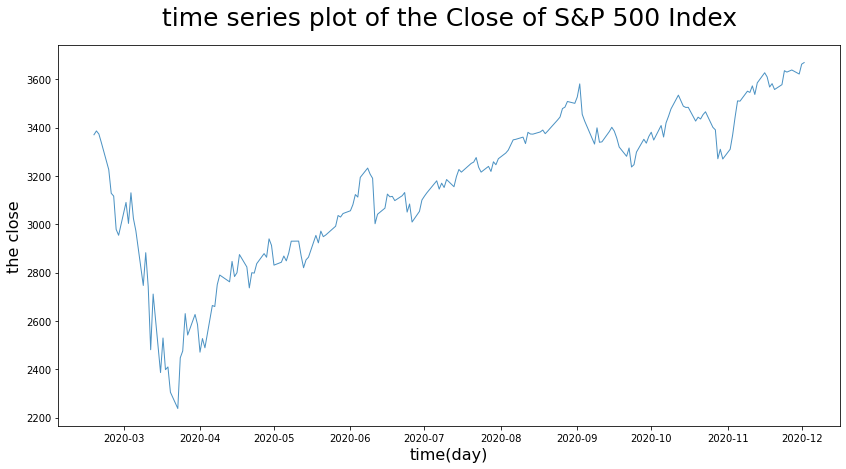

In [4]:
# time series plot
data_time_combine = pd.to_datetime(df_combine["date"], format='%m-%d-%Y', errors='coerce')

plt.figure(figsize=(14, 7))
plt.plot(data_time_combine, df_combine["Close"], linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("the close", fontsize=16)
plt.title("time series plot of the Close of S&P 500 Index", fontsize=25, color='black', pad=20)
plt.show()

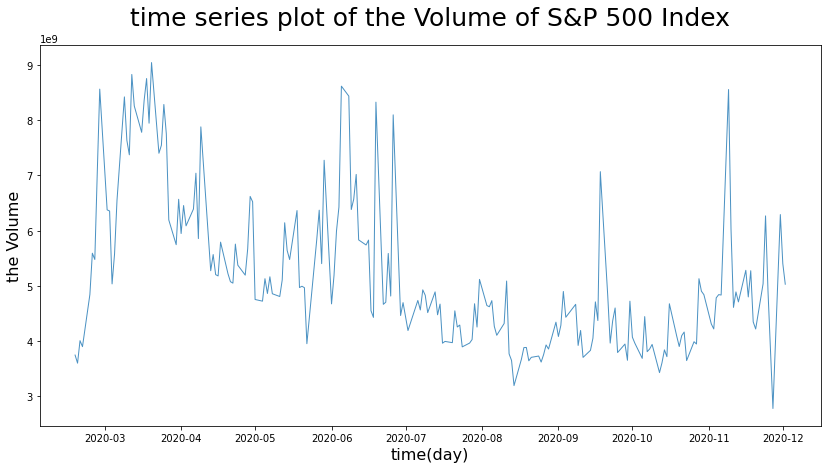

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(data_time_combine, df_combine["Volume"], linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("the Volume", fontsize=16)
plt.title("time series plot of the Volume of S&P 500 Index", fontsize=25, color='black', pad=20)
plt.show()

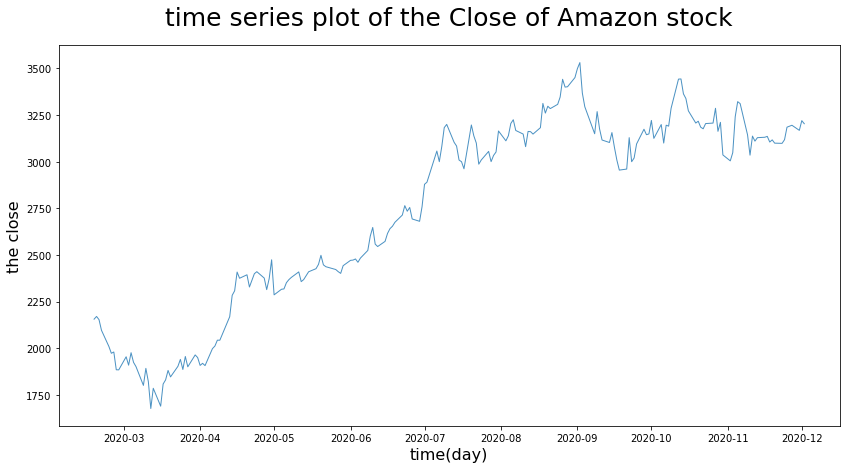

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(data_time_combine, df_combine["AMZ_close"], linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("the close", fontsize=16)
plt.title("time series plot of the Close of Amazon stock", fontsize=25, color='black', pad=20)
plt.show()

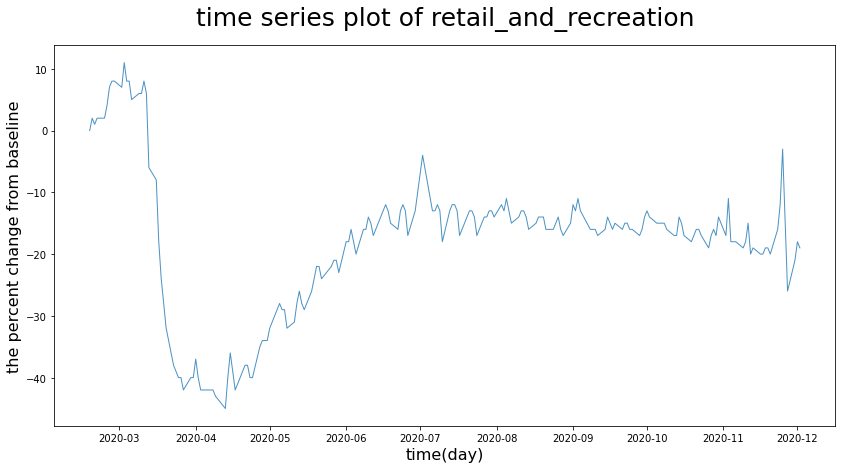

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(data_time_combine, df_combine["retail_and_recreation"], linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("the percent change from baseline", fontsize=16)
plt.title("time series plot of retail_and_recreation", fontsize=25, color='black', pad=20)
plt.show()

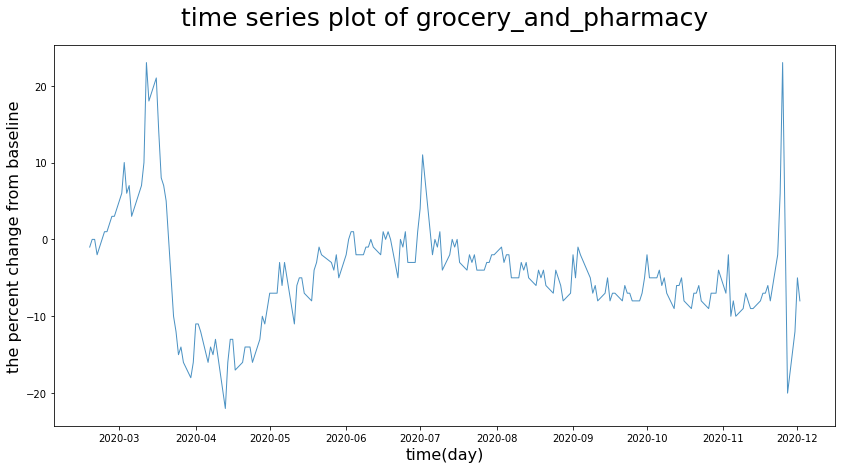

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(data_time_combine, df_combine["grocery_and_pharmacy"], linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("the percent change from baseline", fontsize=16)
plt.title("time series plot of grocery_and_pharmacy", fontsize=25, color='black', pad=20)
plt.show()

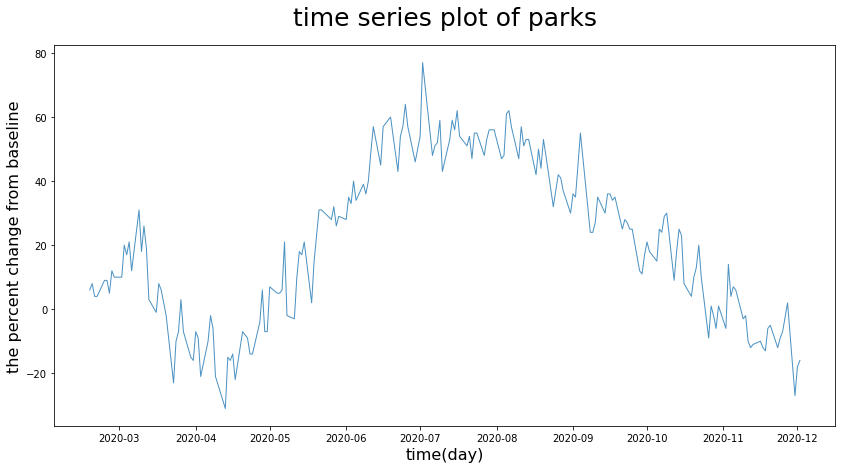

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data_time_combine, df_combine["parks"], linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("the percent change from baseline", fontsize=16)
plt.title("time series plot of parks", fontsize=25, color='black', pad=20)
plt.show()

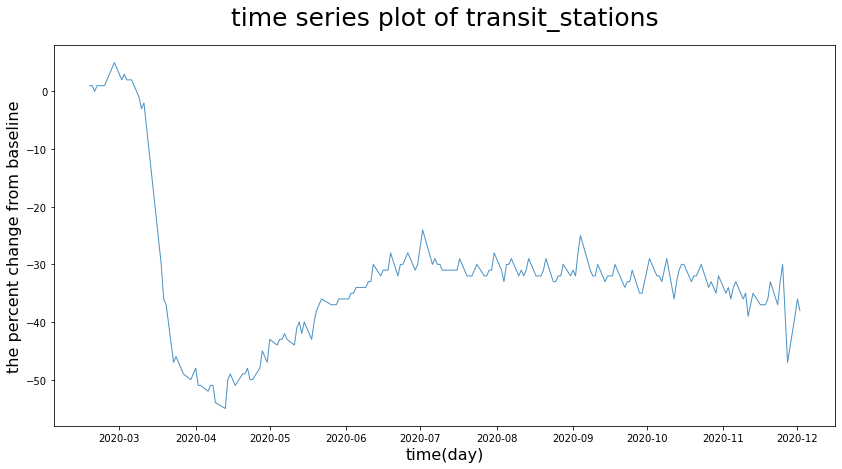

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data_time_combine, df_combine["transit_stations"], linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("the percent change from baseline", fontsize=16)
plt.title("time series plot of transit_stations", fontsize=25, color='black', pad=20)
plt.show()

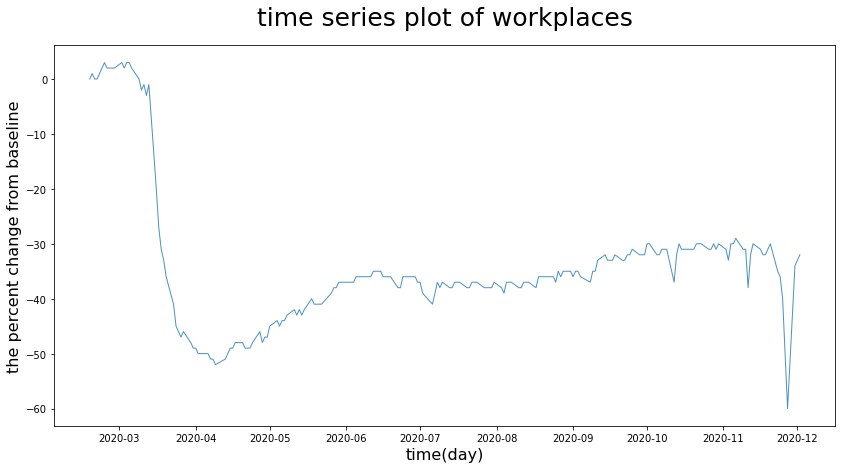

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(data_time_combine, df_combine["workplaces"], linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("the percent change from baseline", fontsize=16)
plt.title("time series plot of workplaces", fontsize=25, color='black', pad=20)
plt.show()

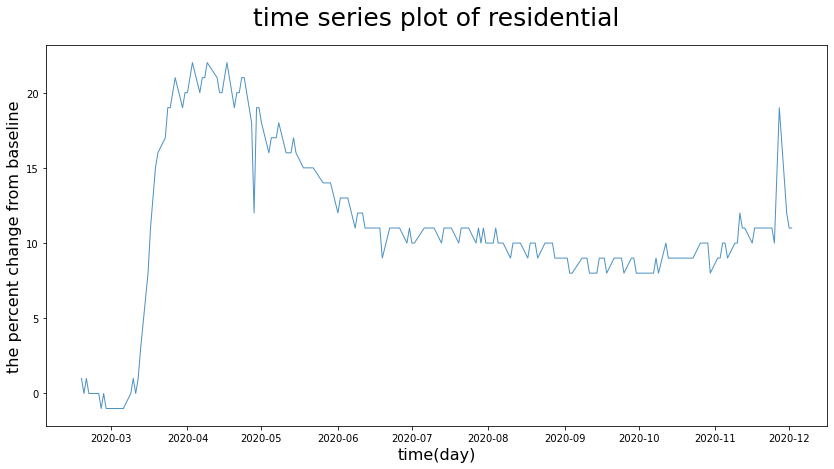

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(data_time_combine, df_combine["residential"], linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("the percent change from baseline", fontsize=16)
plt.title("time series plot of residential", fontsize=25, color='black', pad=20)
plt.show()

In [13]:
# EDA
df_extract = df_combine[[
 'date',
 'Close',
 'Volume',
 'AMZ_close',
 'retail_and_recreation',
 'grocery_and_pharmacy',
 'parks',
 'transit_stations',
 'workplaces',
 'residential']]

 # the data without date
df_extract2 = df_combine[[
 'Close',
 'Volume',
 'AMZ_close',
 'retail_and_recreation',
 'grocery_and_pharmacy',
 'parks',
 'transit_stations',
 'workplaces',
 'residential']]
pandas_profiling.ProfileReport(df_extract)

D:\SH Program\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [14]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
# min-max
extract2_Norm = pd.DataFrame(min_max.fit_transform(df_extract2), index=df_extract2.index, columns=df_extract2.columns)


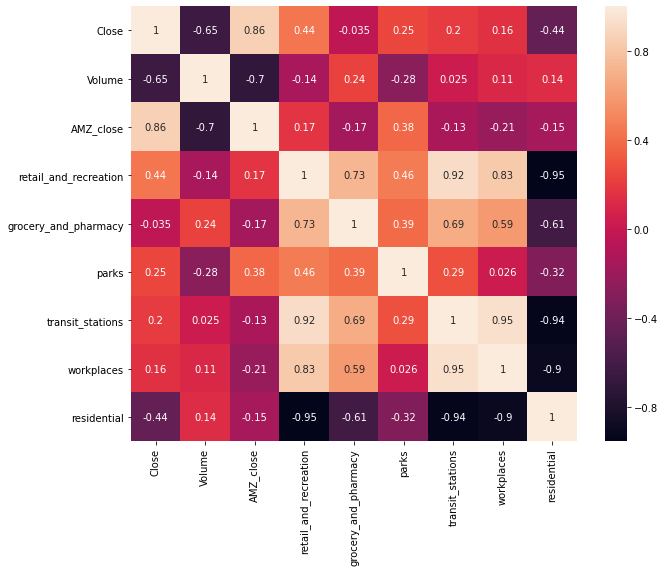

In [15]:
# heatmap. the correlations among each pair of the data

data_corr = extract2_Norm.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr,annot=True)
plt.show()

# Modeling

In [16]:
# split data

from sklearn.model_selection import train_test_split

X = df_extract2[[
 'retail_and_recreation',
 'grocery_and_pharmacy',
 'parks',
 'transit_stations',
 'workplaces',
 'residential']]

Y = df_extract2[[
 'Close']]

Y2 = df_extract2[[
 'AMZ_close']]

# transfrom Y value into int
df_extract3 = df_extract2
df_extract3['Close'] = df_extract3['Close'].astype(int)
Y['Close'] = df_extract3['Close']

df_extract3 = df_extract2
df_extract3['AMZ_close'] = df_extract3['AMZ_close'].astype(int)
Y2['AMZ_close'] = df_extract3['AMZ_close']

# split data for S&P 500 close
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
# split data for Amazon close
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.20, random_state=42)


C:\Users\Phoebus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Phoebus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Phoebus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [18]:
# set model

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# set paras
# LinearRegression
lr_params = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}
# RandomForest
rf_params = {"n_estimators":[5, 10, 15, 20], "min_samples_split":[2, 3, 5, 10],"max_features":["auto","log2"]}
# KNN
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# set model
lr = LinearRegression()
knn = KNeighborsRegressor()
forest = RandomForestRegressor()

# set GridSearchCV
def get_best_model_and_accuracy(model, params, X, y, test_X, test_y, modelName):
    grid = GridSearchCV(model,params,cv=3,n_jobs=1,error_score=0.) 
    grid.fit(X, y)
    # best params
    print("Best Parameters: {}".format(grid.best_params_))
    # best cross validation score
    print("Best Accuracy: {}".format(grid.best_score_))

    # cv_results_df
    cv_results_df = pd.DataFrame(grid.cv_results_)
    # test set evaluate
    # score_set = grid.score(test_X, test_y)
    # print('Evaluate with test set: Accuracy = %f%%'%(score_set*100))

    if(model == forest):
        forest.fit(X, y)
        temp_pred = forest.predict(test_X)
    if(model == lr):
        lr.fit(X, y)
        temp_pred = lr.predict(test_X)
    if(model == knn):
        knn.fit(X, y)
        temp_pred = knn.predict(test_X)

    print('Evaluate with test set: ')
    r2 = r2_score(test_y, temp_pred)
    rmse = np.sqrt(mean_squared_error(test_y, temp_pred))
    print("R^2 Score: " + str(r2))
    print("RMSE Score: " + str(rmse))

    print('\n')
    return cv_results_df

In [19]:

Y_test_Ser = pd.Series(Y_test['Close'].values)
Y_train_Ser = pd.Series(Y_train['Close'].values)
Y2_test_Ser = pd.Series(Y2_test['AMZ_close'].values)
Y2_train_Ser = pd.Series(Y2_train['AMZ_close'].values)

# Training and Testing

In [20]:
# LinearRegression: predict S&P 500 close
print("LinearRegression: predict S&P 500 close: ")
para_log = get_best_model_and_accuracy(lr, lr_params, X_train, Y_train_Ser, X_test, Y_test_Ser, 'LinearRegression')

# LinearRegression: predict Amazon close
print("LinearRegression: predict Amazon close: ")
para_log = get_best_model_and_accuracy(lr, lr_params, X_train, Y2_train_Ser, X_test, Y2_test_Ser, 'LinearRegression')

LinearRegression: predict S&P 500 close: 
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best Accuracy: 0.7376942345120016
Evaluate with test set: 
R^2 Score: 0.6650577092619714
RMSE Score: 158.59809669436336


LinearRegression: predict Amazon close: 
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best Accuracy: 0.7894861364844767
Evaluate with test set: 
R^2 Score: 0.7978560594335382
RMSE Score: 218.3150912475111




In [21]:
# KNN: predict S&P 500 close
print("KNN: predict S&P 500 close: ")
para_log = get_best_model_and_accuracy(knn, knn_params, X_train, Y_train_Ser, X_test, Y_test_Ser, '  KNN  ')

# KNN: predict Amazon close
print("KNN: predict Amazon close: ")
para_log = get_best_model_and_accuracy(knn, knn_params, X_train, Y2_train_Ser, X_test, Y2_test_Ser, '  KNN  ')

KNN: predict S&P 500 close: 
Best Parameters: {'n_neighbors': 1}
Best Accuracy: 0.7826820097533673
Evaluate with test set: 
R^2 Score: 0.750665339047741
RMSE Score: 136.8372399747322


KNN: predict Amazon close: 
Best Parameters: {'n_neighbors': 2}
Best Accuracy: 0.8330294050906976
Evaluate with test set: 
R^2 Score: 0.7986528051423349
RMSE Score: 217.88442449845832




In [22]:
# RandomForest: predict S&P 500 close
print("RandomForest: predict S&P 500 close: ")
para_log = get_best_model_and_accuracy(forest, rf_params, X_train, Y_train_Ser, X_test, Y_test_Ser, 'RandomForest')

# RandomForest: predict Amazon close
print("RandomForest: predict Amazon close: ")
para_log = get_best_model_and_accuracy(forest, rf_params, X_train, Y2_train_Ser, X_test, Y2_test_Ser, 'RandomForest')

RandomForest: predict S&P 500 close: 
Best Parameters: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
Best Accuracy: 0.7549572799035144
Evaluate with test set: 
R^2 Score: 0.8582323166868924
RMSE Score: 103.18144347724923


RandomForest: predict Amazon close: 
Best Parameters: {'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 20}
Best Accuracy: 0.8230679548862181
Evaluate with test set: 
R^2 Score: 0.8761979201643049
RMSE Score: 170.85093678408674


